<a href="https://colab.research.google.com/github/ashishrana1501/PCA-and-Factor-Analysis/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing filterwarnings to ignore warning messages**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Import Required Library**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import shapiro, bartlett
from sklearn import metrics
from statsmodels.stats.stattools import durbin_watson

**Importing Dataset**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Projects/MVD/Life_Expectancy_Cleaned.csv")

In [ ]:
data

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.000000,0.010000,71.279624,65.000000,831,...,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
1,Albania,2015,Developing,77.8,74.0,35.129032,4.600000,364.975229,99.000000,0,...,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,Algeria,2015,Developing,75.6,19.0,21.000000,5.288333,0.000000,95.000000,63,...,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
3,Angola,2015,Developing,52.4,335.0,66.000000,5.288333,0.000000,64.000000,118,...,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,35.129032,5.288333,0.000000,99.000000,0,...,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.0,11.000000,8.010000,0.000000,55.000000,22,...,86.0,4.91,77.0,0.1,4708.515191,9.440444e+06,1.8,1.7,0.670,10.6
2934,Viet Nam,2000,Developing,73.4,139.0,33.000000,1.600000,0.000000,74.035294,831,...,96.0,4.89,96.0,0.1,4708.515191,9.440444e+06,15.3,15.5,0.569,10.4
2935,Yemen,2000,Developing,68.0,252.0,48.000000,0.070000,0.000000,55.000000,0,...,74.0,4.14,74.0,0.1,4708.515191,9.440444e+06,14.1,14.1,0.436,7.7
2936,Zambia,2000,Developing,45.6,399.0,44.000000,2.620000,45.616880,74.035294,831,...,85.0,7.16,85.0,1.8,341.955625,1.531221e+06,7.5,7.5,0.418,9.6


**Data Pre-Processing**

**Creating a copy of original dataset**



In [ ]:
df = data.copy()

In [ ]:
df.head(10)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.000000,0.010000,71.279624,65.0,831,...,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
1,Albania,2015,Developing,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,Algeria,2015,Developing,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,...,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
3,Angola,2015,Developing,52.4,335.0,66.000000,5.288333,0.000000,64.0,118,...,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,...,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9
5,Argentina,2015,Developing,76.3,116.0,8.000000,5.288333,0.000000,94.0,0,...,93.0,7.08,94.0,0.1,13467.123600,2.865628e+07,1.0,0.9,0.826,17.3
6,Armenia,2015,Developing,74.8,118.0,1.000000,5.288333,0.000000,94.0,33,...,96.0,7.08,94.0,0.1,369.654776,2.916950e+05,2.1,2.2,0.741,12.7
7,Australia,2015,Developed,82.8,59.0,1.000000,5.288333,0.000000,93.0,74,...,93.0,7.08,93.0,0.1,16784.346160,2.378934e+07,0.6,0.6,0.937,19.5
8,Austria,2015,Developed,81.5,65.0,35.129032,5.288333,0.000000,93.0,309,...,93.0,7.08,93.0,0.1,16784.346160,8.633169e+06,1.9,2.1,0.892,15.9
9,Azerbaijan,2015,Developing,72.7,118.0,5.000000,5.288333,0.000000,96.0,0,...,98.0,7.08,96.0,0.1,55.313820,9.649341e+06,2.8,2.9,0.758,12.7


In [ ]:
df.tail(10)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
2928,United Republic of Tanzania,2000,Developing,49.2,399.0,95.000000,3.89,0.000000,74.035294,831,...,64.0,2.64,79.0,1.8,4708.515191,9.440444e+06,8.3,8.3,0.512214,10.512717
2929,United States of America,2000,Developed,76.8,114.0,28.000000,8.21,0.000000,55.000000,85,...,52.0,11.66,94.0,0.1,4708.515191,9.440444e+06,0.8,0.7,0.512214,10.512717
2930,Uruguay,2000,Developing,75.1,131.0,1.000000,6.65,645.958382,92.000000,0,...,92.0,7.82,52.0,0.1,6871.897677,3.321245e+06,1.8,1.7,0.738000,14.000000
2931,Uzbekistan,2000,Developing,67.1,189.0,30.000000,1.60,48.509417,74.035294,80,...,99.0,5.29,99.0,0.1,558.221144,2.465400e+04,3.4,3.4,0.291000,10.600000
2932,Vanuatu,2000,Developing,69.0,18.0,50.888889,1.21,21.900752,55.000000,9,...,67.0,3.28,71.0,0.1,1469.849149,1.856300e+04,1.7,1.7,0.291000,9.600000
2933,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.0,11.000000,8.01,0.000000,55.000000,22,...,86.0,4.91,77.0,0.1,4708.515191,9.440444e+06,1.8,1.7,0.670000,10.600000
2934,Viet Nam,2000,Developing,73.4,139.0,33.000000,1.60,0.000000,74.035294,831,...,96.0,4.89,96.0,0.1,4708.515191,9.440444e+06,15.3,15.5,0.569000,10.400000
2935,Yemen,2000,Developing,68.0,252.0,48.000000,0.07,0.000000,55.000000,0,...,74.0,4.14,74.0,0.1,4708.515191,9.440444e+06,14.1,14.1,0.436000,7.700000
2936,Zambia,2000,Developing,45.6,399.0,44.000000,2.62,45.616880,74.035294,831,...,85.0,7.16,85.0,1.8,341.955625,1.531221e+06,7.5,7.5,0.418000,9.600000
2937,Zimbabwe,2000,Developing,46.0,399.0,24.000000,1.68,0.000000,79.000000,831,...,78.0,7.10,78.0,1.8,547.358878,1.222225e+07,11.0,11.2,0.434000,9.800000


**To Find Data type and missing values in data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_Expectancy                  2938 non-null   float64
 4   Adult_Mortality                  2938 non-null   float64
 5   Infant_Deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   Percentage_Expenditure           2938 non-null   float64
 8   HepatitisB                       2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  Under_Five_Deaths                2938 non-null   float64
 12  Polio               



1.   No missing values present in the data set.
2.   Independent variables are of float data type where as dependent variable(Life_Expectancy) are of float data type.




In [ ]:
df.shape

(2938, 22)

In [ ]:
df.size

64636

**Descriptive statistics**

In [ ]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.248795,167.845455,28.607323,4.640667,281.501093,83.671293,220.691287,28.262067,38.640545,85.514684,5.972192,85.469564,0.526991,5033.943592,7.508368e+06,4.703351,4.720470,0.640659,12.049874
std,4.613841,9.462136,104.544496,25.699534,3.910036,384.161450,13.848933,329.192321,4.347136,37.732345,15.270927,2.302224,15.217611,0.675962,5408.511820,8.646842e+06,3.925702,3.964268,0.171622,3.085673
min,2000.000000,45.600000,13.000000,1.000000,0.010000,0.000000,55.000000,0.000000,21.200000,1.000000,52.000000,0.370000,52.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.291000,4.900000
25%,2004.000000,63.200000,84.000000,4.000000,1.092500,4.685343,74.099237,0.000000,25.600000,4.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,157.000000,28.000000,4.140000,64.912906,87.000000,17.000000,29.153086,34.000000,93.000000,5.910000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.673000,12.300000
75%,2012.000000,75.600000,227.000000,43.766917,7.390000,441.534144,96.000000,360.250000,29.444048,60.014815,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,399.000000,95.000000,15.140000,1077.712092,99.000000,831.000000,34.700000,138.000000,99.000000,11.660000,99.000000,1.800000,16784.346160,2.865628e+07,15.300000,15.500000,0.948000,19.500000




*   describe() function tell us five number summary that is min, max, quartile, mean, count.




**Finding Missing values in data set if any**

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_10-19_Years               0
Thinness_5-9_Years                 0
Income_Composition_Of_Resources    0
Schooling                          0
dtype: int64



*   Here we can see that, there are no missing values present in data



**Correlation**

In [ ]:
df.corr()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
Year,1.000000,0.169796,-0.071404,-0.077173,-0.031642,0.032807,0.203759,-0.118772,0.040401,-0.097158,0.118122,0.131170,0.150044,-0.088913,0.148771,0.067801,-0.049728,-0.050187,0.224731,0.210745
Life_Expectancy,0.169796,1.000000,-0.672163,-0.222292,0.395089,0.488440,0.315120,-0.337887,0.453741,-0.298626,0.573291,0.222306,0.578952,-0.796939,0.501011,0.011363,-0.514966,-0.512694,0.792878,0.742306
Adult_Mortality,-0.071404,-0.672163,1.000000,0.120120,-0.190605,-0.297388,-0.214853,0.216495,-0.276078,0.168997,-0.349760,-0.126291,-0.353231,0.590240,-0.299677,0.000463,0.332637,0.339047,-0.513834,-0.455771
Infant_Deaths,-0.077173,-0.222292,0.120120,1.000000,-0.062119,-0.094053,-0.196145,0.323610,-0.330900,0.966996,-0.217511,-0.086289,-0.225997,0.124310,-0.059337,0.176352,0.196669,0.202573,-0.178389,-0.191062
Alcohol,-0.031642,0.395089,-0.190605,-0.062119,1.000000,0.378069,0.106352,-0.197193,0.206206,-0.104954,0.265830,0.308434,0.272948,-0.193443,0.389598,-0.036283,-0.436755,-0.427166,0.475112,0.519757
Percentage_Expenditure,0.032807,0.488440,-0.297388,-0.094053,0.378069,1.000000,0.122870,-0.194687,0.209439,-0.131361,0.268385,0.159830,0.268411,-0.295791,0.712940,-0.070366,-0.331693,-0.333748,0.556006,0.530422
HepatitisB,0.203759,0.315120,-0.214853,-0.196145,0.106352,0.122870,1.000000,-0.266487,0.232000,-0.239049,0.608008,0.071100,0.647198,-0.278977,0.172066,-0.004936,-0.134103,-0.139528,0.299493,0.290399
Measles,-0.118772,-0.337887,0.216495,0.323610,-0.197193,-0.194687,-0.266487,1.000000,-0.388173,0.368517,-0.320104,-0.161737,-0.315164,0.226305,-0.183792,0.222488,0.359571,0.364201,-0.274976,-0.329274
BMI,0.040401,0.453741,-0.276078,-0.330900,0.206206,0.209439,0.232000,-0.388173,1.000000,-0.383107,0.348755,0.129532,0.361165,-0.382386,0.210357,-0.071089,-0.486359,-0.485120,0.398669,0.380670
Under_Five_Deaths,-0.097158,-0.298626,0.168997,0.966996,-0.104954,-0.131361,-0.239049,0.368517,-0.383107,1.000000,-0.281667,-0.096826,-0.291057,0.198160,-0.102372,0.180288,0.235471,0.236927,-0.253539,-0.264996




*   Independent variable is Highly Correlated with dependent variable with the value of correlation 0.98



**Data Visualization**

In [ ]:
dfc = df.iloc[:, 3:]
dfc.head(5)

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,65.0,263.0,62.000000,0.010000,71.279624,65.0,831,21.200000,83.000000,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
1,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,28.840789,44.844961,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,28.840789,24.000000,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
3,52.4,335.0,66.000000,5.288333,0.000000,64.0,118,23.300000,98.000000,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,34.700000,44.844961,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9


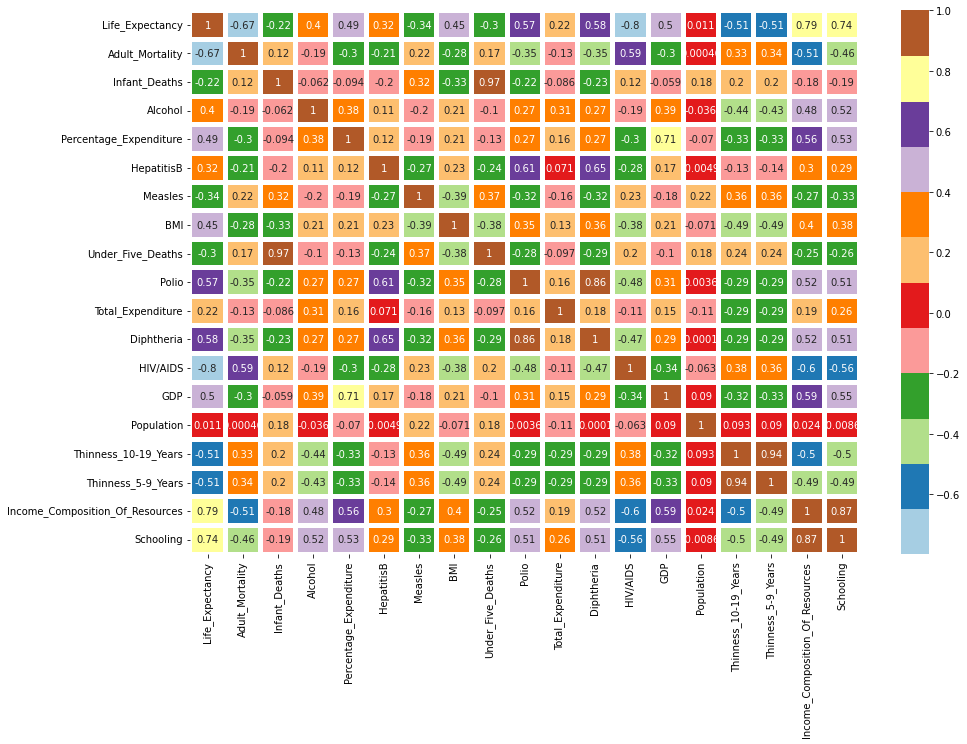

In [ ]:
plt.figure(figsize= (15,10))
sns.heatmap(dfc.corr(),
            cmap="Paired", 
            linecolor = "white" ,
            linewidth= 4 ,  
            cbar= "cividis" ,
            annot=True)
plt.show()

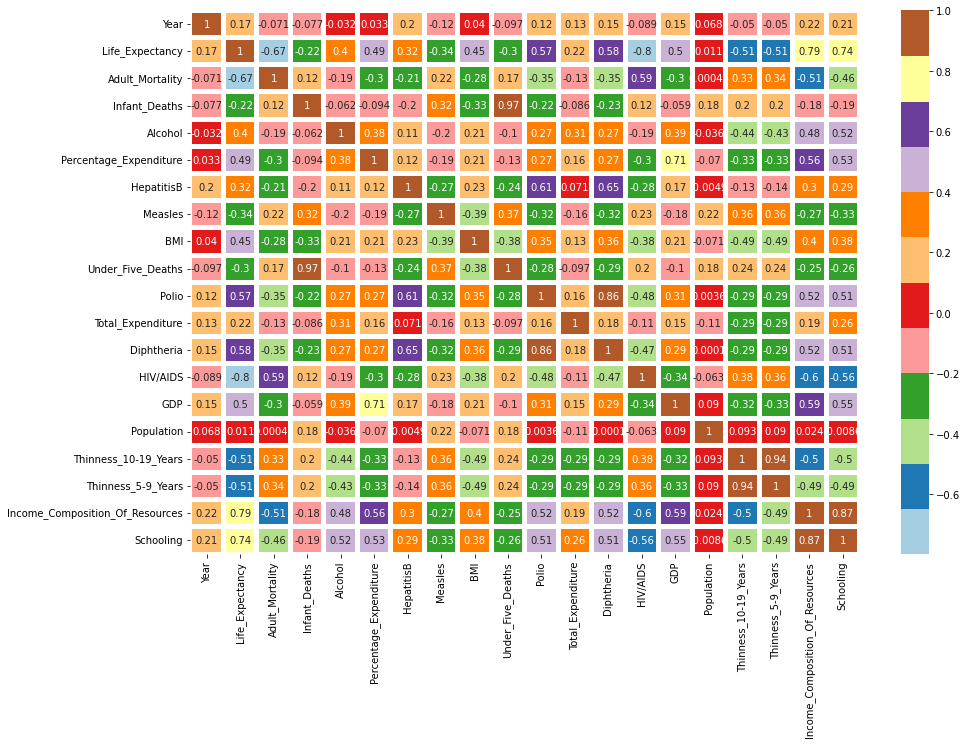

In [ ]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),
            cmap="Paired", 
            linecolor = "white" ,
            linewidth= 4 ,  
            cbar= "cividis" ,
            annot=True)
plt.show()

**Checking Assumption of Linear Regression**

**Linearity**


> Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable



**From Scatter Plot We can observe that there is a positive linear correlation between Temperature and Revenue.**

**Data Prepration**

**Dividing the data frame to independent and dependent variable**

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')

In [ ]:
x = df.iloc[:, 4:]
y = df['Life_Expectancy']

In [ ]:
x

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,263.0,62.000000,0.010000,71.279624,65.000000,831,21.200000,83.000000,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
1,74.0,35.129032,4.600000,364.975229,99.000000,0,28.840789,44.844961,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,19.0,21.000000,5.288333,0.000000,95.000000,63,28.840789,24.000000,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
3,335.0,66.000000,5.288333,0.000000,64.000000,118,23.300000,98.000000,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,13.0,35.129032,5.288333,0.000000,99.000000,0,34.700000,44.844961,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,168.0,11.000000,8.010000,0.000000,55.000000,22,28.000926,13.000000,86.0,4.91,77.0,0.1,4708.515191,9.440444e+06,1.8,1.7,0.670,10.6
2934,139.0,33.000000,1.600000,0.000000,74.035294,831,28.000926,43.000000,96.0,4.89,96.0,0.1,4708.515191,9.440444e+06,15.3,15.5,0.569,10.4
2935,252.0,48.000000,0.070000,0.000000,55.000000,0,31.200000,66.000000,74.0,4.14,74.0,0.1,4708.515191,9.440444e+06,14.1,14.1,0.436,7.7
2936,399.0,44.000000,2.620000,45.616880,74.035294,831,21.200000,72.000000,85.0,7.16,85.0,1.8,341.955625,1.531221e+06,7.5,7.5,0.418,9.6


In [ ]:
y

0       65.0
1       77.8
2       75.6
3       52.4
4       76.4
        ... 
2933    72.5
2934    73.4
2935    68.0
2936    45.6
2937    46.0
Name: Life_Expectancy, Length: 2938, dtype: float64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]

In [ ]:
print(vif_data)

                            feature         VIF
0                   Adult_Mortality    5.785661
1                     Infant_Deaths   38.701949
2                           Alcohol    3.856092
3            Percentage_Expenditure    3.498696
4                        HepatitisB   64.349509
5                           Measles    2.007367
6                               BMI   42.515347
7                 Under_Five_Deaths   37.291577
8                             Polio  127.890952
9                 Total_Expenditure    8.803583
10                       Diphtheria  142.728088
11                         HIV/AIDS    3.080511
12                              GDP    4.471852
13                       Population    2.011971
14             Thinness_10-19_Years   22.439046
15               Thinness_5-9_Years   22.041956
16  Income_Composition_Of_Resources   78.554615
17                        Schooling   77.418198


In [ ]:
df1  = x.drop(["HepatitisB","Polio","Diphtheria","Income_Composition_Of_Resources", "Schooling"], axis=1)
df1.head(5)

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Measles,BMI,Under_Five_Deaths,Total_Expenditure,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years
0,263.0,62.000000,0.010000,71.279624,831,21.200000,83.000000,8.16,0.1,584.259210,2.865628e+07,15.3,15.5
1,74.0,35.129032,4.600000,364.975229,0,28.840789,44.844961,6.00,0.1,3954.227830,2.887300e+04,1.2,1.3
2,19.0,21.000000,5.288333,0.000000,63,28.840789,24.000000,7.08,0.1,4132.762920,2.865628e+07,6.0,5.8
3,335.0,66.000000,5.288333,0.000000,118,23.300000,98.000000,7.08,1.8,3695.793748,2.785935e+06,8.3,8.2
4,13.0,35.129032,5.288333,0.000000,0,34.700000,44.844961,7.08,0.2,13566.954100,1.109741e+07,3.3,3.3


In [ ]:
from pandas.core.frame import DataFrame
df2 = pd.DataFrame(df1)
df2.head(5)

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Measles,BMI,Under_Five_Deaths,Total_Expenditure,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years
0,263.0,62.000000,0.010000,71.279624,831,21.200000,83.000000,8.16,0.1,584.259210,2.865628e+07,15.3,15.5
1,74.0,35.129032,4.600000,364.975229,0,28.840789,44.844961,6.00,0.1,3954.227830,2.887300e+04,1.2,1.3
2,19.0,21.000000,5.288333,0.000000,63,28.840789,24.000000,7.08,0.1,4132.762920,2.865628e+07,6.0,5.8
3,335.0,66.000000,5.288333,0.000000,118,23.300000,98.000000,7.08,1.8,3695.793748,2.785935e+06,8.3,8.2
4,13.0,35.129032,5.288333,0.000000,0,34.700000,44.844961,7.08,0.2,13566.954100,1.109741e+07,3.3,3.3


In [ ]:
df3 = df2.copy()
df3['Deaths'] = df2.apply(lambda x: x['Infant_Deaths'] + x['Under_Five_Deaths']+x['Adult_Mortality'],axis=1)

df3['Thinness'] = df2.apply(lambda x: x['Thinness_5-9_Years'] + x['Thinness_10-19_Years'],axis=1)
v = df3.drop(['Infant_Deaths','Under_Five_Deaths','Thinness_5-9_Years','Thinness_10-19_Years','Adult_Mortality','BMI','Total_Expenditure'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = v.columns

vif_data["VIF"] = [variance_inflation_factor(v.values,i)
                        for i in range(len(v.columns))]


In [ ]:
print(vif_data)

                  feature       VIF
0                 Alcohol  2.581483
1  Percentage_Expenditure  3.305359
2                 Measles  1.852213
3                HIV/AIDS  2.562638
4                     GDP  4.114226
5              Population  1.916516
6                  Deaths  5.416824
7                Thinness  3.095686


In [ ]:
v.head(2)

,Alcohol,Percentage_Expenditure,Measles,HIV/AIDS,GDP,Population,Deaths,Thinness
0,0.01,71.279624,831,0.1,584.25921,28656282.0,408.000000,30.8
1,4.60,364.975229,0,0.1,3954.22783,28873.0,153.973993,2.5


In [ ]:
x = v.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

**Spliting the X,Y into train and test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2, random_state=0) 

**Training the Algorithm**

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training Successfully Completed")

Training Successfully Completed


In [ ]:
regressor.score(x_train,y_train)

0.7950801425762958

In [ ]:
#Printing the model coefficients
print(regressor.intercept_)

69.24249757584911


In [ ]:
# pair the feature names with the coefficients
list(zip(X, regressor.coef_))

[(array([-1.18450452, -0.54731482,  1.85427352, -0.63178629, -0.82285885,
          2.44615488,  1.33154282,  2.74988825]), 1.1225026661991166),
 (array([-0.01040256,  0.21732619, -0.67051641, -0.63178629, -0.19966667,
         -0.86514456, -0.62469457, -0.89069855]), 0.9976112075026453),
 (array([ 0.1656701 , -0.73289241, -0.47910635, -0.63178629, -0.16665103,
          2.44615488, -1.31757831,  0.30567803]), -0.3194931667838087),
 (array([ 0.1656701 , -0.73289241, -0.31200232,  1.88357424, -0.24745765,
         -0.54623838,  2.03232777,  0.91029845]), -4.935482872174618),
 (array([ 0.1656701 , -0.73289241, -0.67051641, -0.4838239 ,  1.57796883,
          0.41514015, -1.09445151, -0.36326371]), 0.8318395780183014),
 (array([ 0.1656701 , -0.73289241, -0.67051641, -0.63178629,  1.55950765,
          2.44615488, -0.7862139 , -0.96788414]), 0.1800634241099417),
 (array([ 0.1656701 , -0.73289241, -0.570254  , -0.63178629, -0.86254463,
         -0.83474425, -0.88632603, -0.65914179]), -2.37

In [ ]:
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.7950801425762958
Test Score: 0.8009822910907765


In [ ]:
print('Intercept is :',regressor.intercept_)
print('Coefficient is :',regressor.coef_)

Intercept is : 69.24249757584911
Coefficient is : [ 1.12250267  0.99761121 -0.31949317 -4.93548287  0.83183958  0.18006342
 -2.3797     -0.94994484]


In [ ]:
y_predic = regressor.predict(x_test)
y_predic

array([76.06340908, 59.1935145 , 79.47169867, 56.59339369, 75.10866162,
       68.25914455, 78.18485005, 80.35756203, 64.15464715, 52.06267777,
       81.2848586 , 77.52033062, 66.81930043, 72.87138762, 78.38955735,
       81.96211777, 73.88976422, 56.51319797, 72.59627943, 70.54637029,
       77.47413681, 53.44691559, 54.03510619, 71.53722872, 68.98259036,
       74.78586232, 72.77323001, 79.05074008, 73.70818426, 75.35340641,
       71.71381005, 70.13048923, 70.47528328, 61.23247093, 73.1069936 ,
       70.69460196, 74.22130179, 51.38598873, 73.04493629, 79.82581138,
       51.30260499, 82.13705251, 71.15279316, 70.21145841, 50.92596759,
       62.66654067, 65.98484821, 82.77171353, 69.36463247, 72.55777347,
       80.75175137, 62.31973975, 74.60868621, 74.2251497 , 74.04476851,
       72.34675239, 49.74400747, 71.88625164, 70.90204667, 63.35440191,
       69.00718357, 75.14523582, 64.69907112, 60.28705312, 74.79693035,
       76.65647921, 71.81126116, 56.1569565 , 53.82722068, 55.40

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predic})    
df1

,Actual,Predicted
867,74.5,76.063409
1780,68.0,59.193515
621,86.0,79.471699
2715,45.6,56.593394
2717,73.3,75.108662
...,...,...
1290,50.0,52.685856
2724,72.7,71.232720
392,58.6,65.217747
27,53.3,54.305772


**Mean of Residuals**


> Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.




In [ ]:
y_pred_train = regressor.predict(x_train)
residuals = y_train - y_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals = {}".format(mean_residuals))

Mean of Residuals = -2.9903266624116555e-15


**The mean of the residuals is so small that we can consider it zero.**

**Check for Homoscedasticity**




> Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.



**Detecting heteroscedasticity!**


> **Graphical Method:** Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.



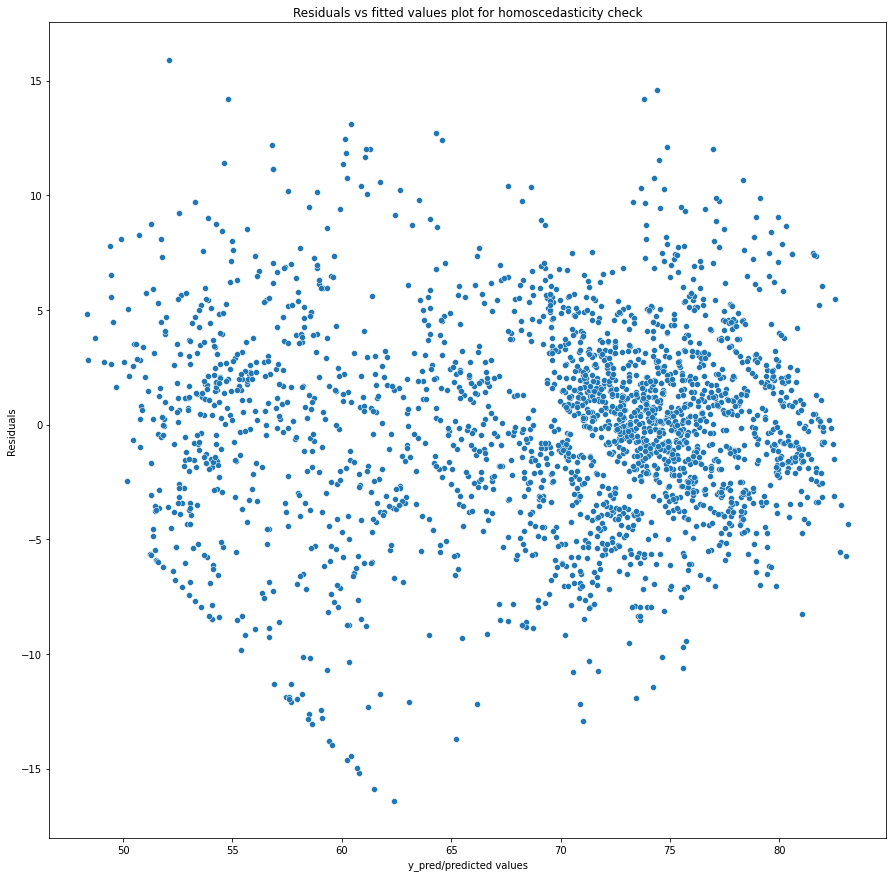

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(y_pred_train, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


**From the scatter plot it is clear that there is no specific patters forming. So we can say homoscedasticity is present.**

In [ ]:
# Homoscadasticity

from statsmodels.formula.api import ols

reg = ols("y~x", data = df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1432.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        04:26:18   Log-Likelihood:                -8432.7
No. Observations:                2938   AIC:                         1.688e+04
Df Residuals:                    2929   BIC:                         1.694e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.7201      0.253    298.902      0.0

**Goldfeld Quandt Test**

**Checking heteroscedasticity :** Using Goldfeld Quandt we test for heteroscedasticity.




> **Null Hypothesis:** Error terms are homoscedastic

> **Alternative Hypothesis:** Error terms are heteroscedastic.





In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 1.0728995356504136), ('p-value', 0.1147789295148989)]

Since p value is greater than 0.05 in Goldfeld Quandt Test.
Therefore, we do not reject Null hypothesis.
Hnece, we Conclude that error terms are homoscedastic.





**Check for Normality of error terms/residuals**

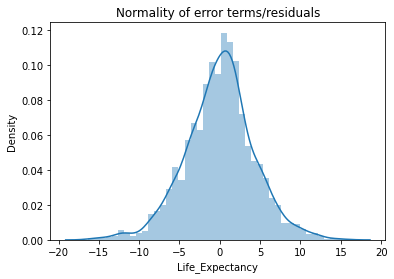

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

((array([-3.43625043, -3.1881843 , -3.0507607 , ...,  3.0507607 ,
          3.1881843 ,  3.43625043]),
  array([-16.40425006, -15.87318158, -15.17978037, ...,  14.18482208,
          14.59434404,  15.91751215])),
 (4.258830295261609, -4.101264324229906e-15, 0.9962739455181421))

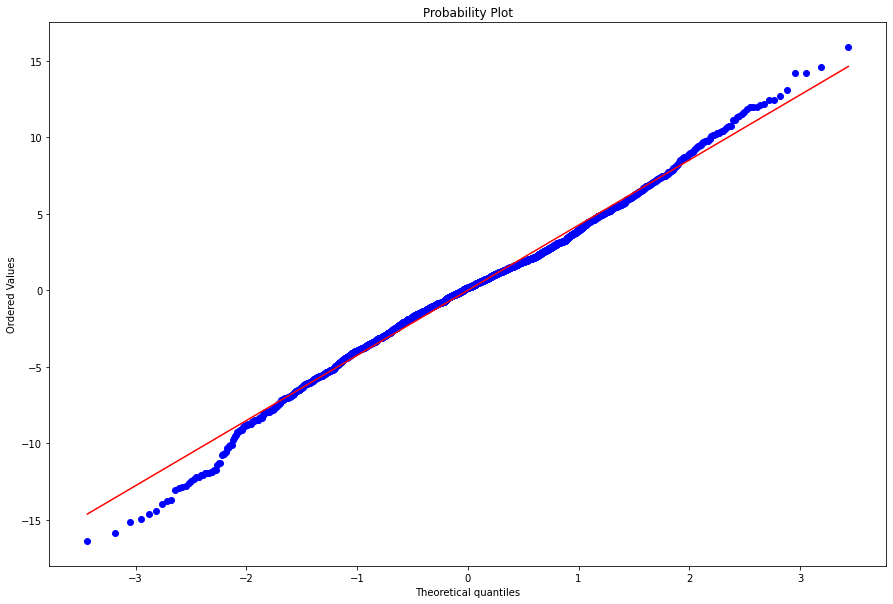

In [ ]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize = (15,10))
stats.probplot(residuals, dist = "norm", plot = plt)

**No autocorrelation of residuals**

> When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

> In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

> There should not be autocorrelation in the data so the error terms should not form any pattern.

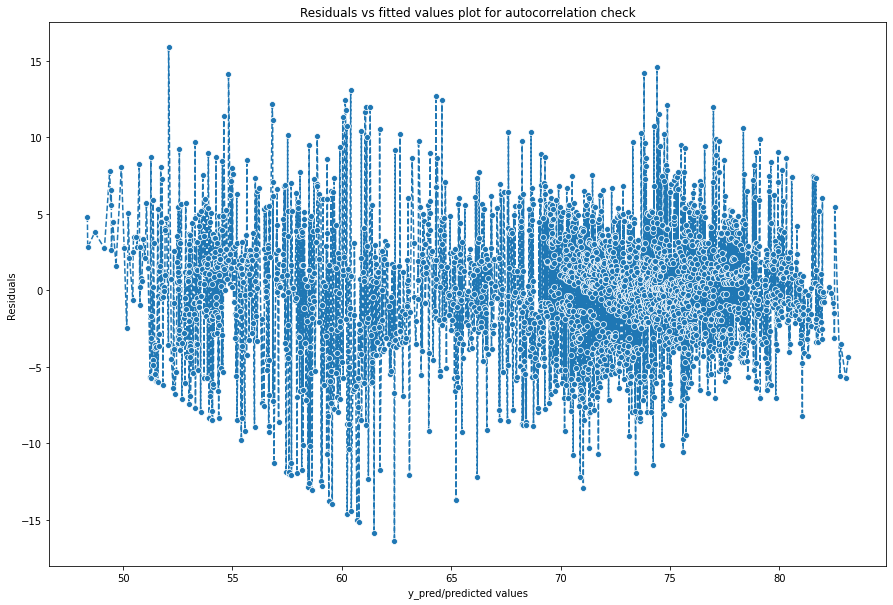

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(y_pred_train, residuals, marker = 'o', linestyle = '--')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for autocorrelation check')
plt.show()

**Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.**

> **Null Hypothesis:** Autocorrelation is absent.

> **Alternative Hypothesis:** Autocorrelation is present.

In [ ]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.08870620250625501

**Since p value is greater than 0.05 we do not reject the null hypothesis that error terms are not autocorrelated.**

**No perfect multicollinearity**

> In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

**Model Evaluation**

In [ ]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_predic))
print("MAE:",mse)

MAE: 3.2876048065829337


In [ ]:
# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_predic)))
print("RMSE:",rmse)

RMSE: 4.272886901676301


In [ ]:
# To find coefficient of determination
r2 =  r2_score(y_test, y_predic)
print("R-Square:",r2)

R-Square: 0.8009822910907765


In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_predic)
meanSqErr = metrics.mean_squared_error(y_test, y_predic)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predic))
MAPE = metrics.mean_absolute_percentage_error(y_test, y_predic)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percenatge Error:', MAPE)


Mean Absolute Error: 3.2876048065829337
Mean Square Error: 18.257562474516906
Root Mean Square Error: 4.272886901676301
Mean Absolute Percenatge Error: 0.0497442965090258


In [ ]:
## R Square
corr_matrix = np.corrcoef(y_test, y_predic)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.8018248026877163


In [ ]:
## Adjusted R Square
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.7957359850289879

**Linearity**


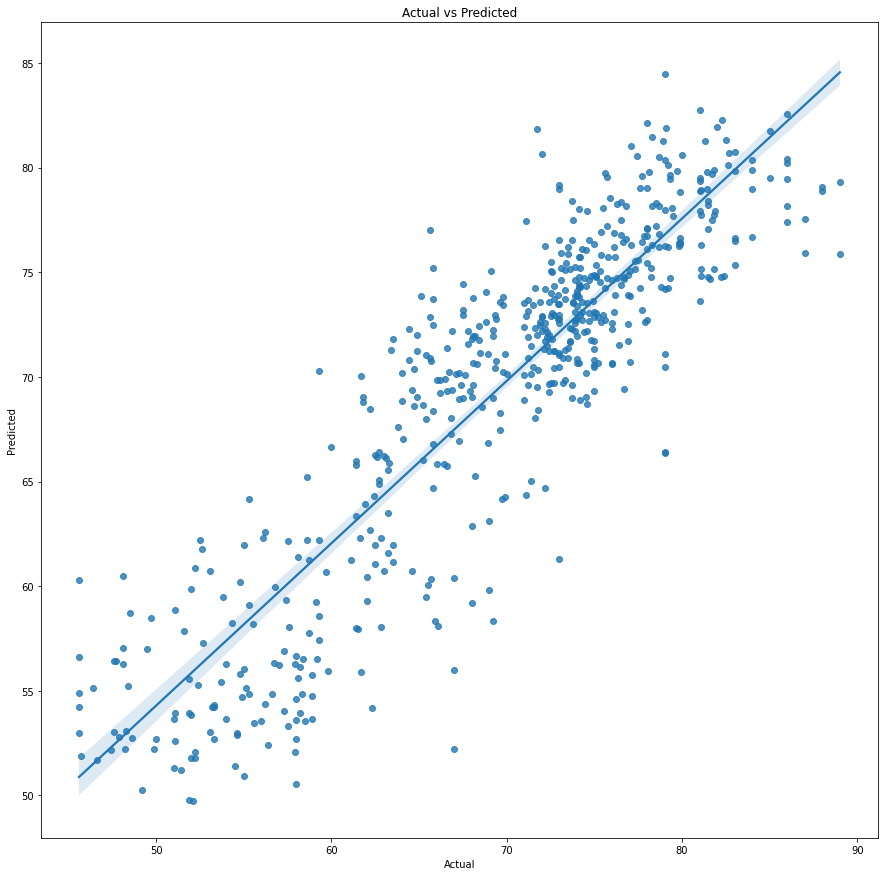

In [ ]:
plt.figure(figsize=(15,15))
sns.regplot(y_test, y_predic)
plt.xlabel('Actual')
plt.ylabel('Predicted')
p = plt.title('Actual vs Predicted')